# Ex1: Ziegler & Nichols - Frequency response

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import control as ct

## System

In [2]:
# Definition
num1 = [1]
den1 = [1, 7, 12, 0]

G = ct.tf(num1, den1)
print(G)


        1
------------------
s^3 + 7 s^2 + 12 s



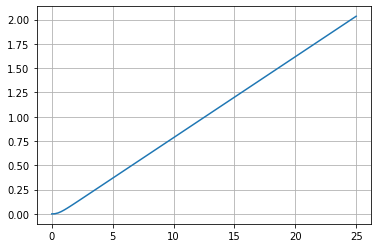

In [3]:
# Response
t1, c1 = ct.step_response(G)
plt.plot(t1, c1)
plt.grid()

## Controller

In [4]:
tsim = 12
dt = 0.1
t = np.arange(0, tsim, dt)

Kcr,_, Wcr, _ = ct.margin(G)
Pcr = 2*np.pi/Wcr

### P controller

Kp: 42.0000


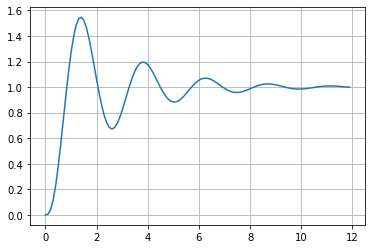

In [5]:
Kp = 0.5*Kcr
print('Kp: {a:1.4f}'.format(a=Kp))

Gc1 = Kp


t2, c2 = ct.step_response(ct.feedback(Gc1*G), T=t)
plt.plot(t2, c2)
plt.grid()

### PI controller

Kp: 37.8000, Ti: 1.5115


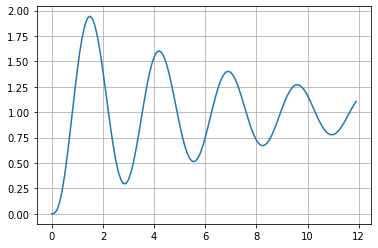

In [6]:
Kp = 0.45*Kcr
Ti = Pcr/1.2
print('Kp: {a:1.4f}, Ti: {b:1.4f}'.format(a=Kp, b=Ti))

Gc2 = ct.tf([Kp*Ti, Kp],[Ti, 0])


t3, c3 = ct.step_response(ct.feedback(Gc2*G), T=t)
plt.plot(t3, c3)
plt.grid()

### PID controller

Kp: 50.4000, Ti: 0.9069, Td: 0.2267


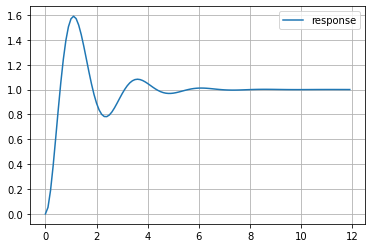

In [7]:
Kp = 0.6*Kcr
Ti = 0.5*Pcr
Td = 0.125*Pcr
print('Kp: {a:1.4f}, Ti: {b:1.4f}, Td: {c:1.4f}'.format(a=Kp, b=Ti, c=Td))

Gc3 = ct.tf([Kp*Ti*Td, Kp*Ti, Kp],[Ti, 0])


t4, c4 = ct.step_response(ct.feedback(Gc3*G), T=t)
plt.plot(t4, c4, label="response")
plt.legend()
plt.grid()

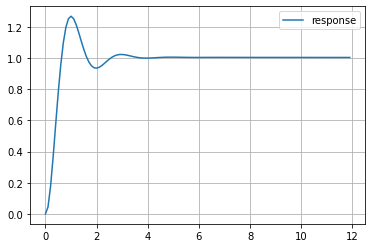

In [14]:
N = 20

Tf = Td / N

P = ct.tf([Kp],[1])
I = ct.tf([1],[Ti, 0])
D = ct.tf([Kp*Td, 0],[Tf, 1])

Gc4 = P + I + D

t5, c5 = ct.step_response(ct.feedback(Gc4*G), T=t)
plt.plot(t5, c5, label="response")
plt.legend()
plt.grid()